<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/Feature_selection_using_Lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/NP_exo.csv')

df = df.set_index("Date") # define Date  as index

df.shape

(52416, 7)

In [25]:
X=df.iloc[:, 1:7]
y=df.iloc[:, 0]

In [26]:
X_train = X[:-17472]; X_test = X[-17472:]
y_train = y[:-17472]; y_test = y[-17472:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34944, 6), (34944,), (17472, 6), (17472,))

In [27]:
features = list(X.columns.values)

In [28]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [29]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [30]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............model__alpha=0.1;, score=-151.785 total time=   0.1s
[CV 2/5] END ................model__alpha=0.1;, score=-26.134 total time=   0.2s
[CV 3/5] END ................model__alpha=0.1;, score=-32.454 total time=   0.2s
[CV 4/5] END ...............model__alpha=0.1;, score=-189.393 total time=   0.1s
[CV 5/5] END ................model__alpha=0.1;, score=-29.772 total time=   0.2s
[CV 1/5] END ...............model__alpha=0.2;, score=-165.193 total time=   0.1s
[CV 2/5] END ................model__alpha=0.2;, score=-23.431 total time=   0.1s
[CV 3/5] END ................model__alpha=0.2;, score=-30.443 total time=   0.2s
[CV 4/5] END ...............model__alpha=0.2;, score=-210.095 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-27.339 total time=   0.2s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-176.688 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
search.best_params_


{'model__alpha': 0.1}

In [32]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [33]:
importance = np.abs(coefficients)

In [34]:
np.array(features)[importance > 0]

array([' Grid load forecast', ' Wind power forecast', 'NP Consumption',
       'NP Consumption prognosis', 'NP Production',
       'NP Production prognosis'], dtype='<U24')

In [35]:
np.array(features)[importance == 0]

array([], dtype='<U24')

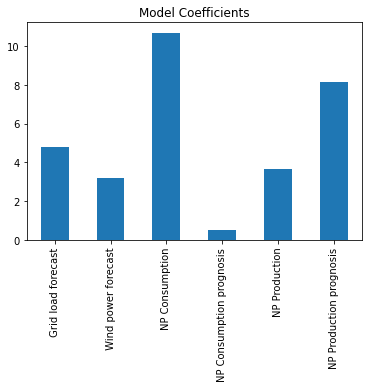

In [37]:
coef = pd.Series(importance ,list(X.columns))
coef.plot(kind='bar', title='Model Coefficients')